In [1]:
import scipy
import seaborn as sns

In [5]:
from bs4 import BeautifulSoup, Comment
import urllib.request
import re
import pandas as pd

url='https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats'

soup = BeautifulSoup(urllib.request.urlopen(url), 'html5lib')

nowe = soup.find('table', class_='min_width')
lista_proby = []
lista_udane = []
lista_procent = []
imiona = []
imiona1 = []
i = 0
for row in nowe.tbody.find_all('tr'):    
    columns = row.find_all('td')
    if columns != []:
        imie = columns[0].text.strip()
        liga = columns[4].text.strip()
        wiek = columns[5].text.strip()
        czas = columns[7].text.strip()
        proby = columns[15].text.strip()
        udane = columns[16].text.strip()
        procent = columns[17].text.strip()
        if proby != '' and udane != '' and procent != '':
            imiona.append(imie)
            lista_proby.append([("Imie",imie),("Liga",liga),("Proby",int(proby)),("Wiek",wiek),("Czas",float(czas))])
            lista_udane.append([("Imie",imie),("Liga",liga),("Udane",int(udane))])
            lista_procent.append([("Imie",imie),("Liga",liga),("Procent",float(procent))])
print(lista_proby)

[[('Imie', 'Max Aarons'), ('Liga', 'eng Premier League'), ('Proby', 32), ('Wiek', '24-123'), ('Czas', 13.0)], [('Imie', 'Brenden Aaronson'), ('Liga', 'de Bundesliga'), ('Proby', 65), ('Wiek', '23-197'), ('Czas', 12.6)], [('Imie', 'Paxten Aaronson'), ('Liga', 'de Bundesliga'), ('Proby', 7), ('Wiek', '20-254'), ('Czas', 1.1)], [('Imie', 'Yunis Abdelhamid'), ('Liga', 'fr Ligue 1'), ('Proby', 15), ('Wiek', '36-221'), ('Czas', 27.9)], [('Imie', 'Salis Abdul Samed'), ('Liga', 'fr Ligue 1'), ('Proby', 19), ('Wiek', '24-041'), ('Czas', 16.8)], [('Imie', 'Laurent Abergel'), ('Liga', 'fr Ligue 1'), ('Proby', 63), ('Wiek', '31-095'), ('Czas', 29.8)], [('Imie', 'Matthis Abline'), ('Liga', 'fr Ligue 1'), ('Proby', 27), ('Wiek', '21-039'), ('Czas', 9.9)], [('Imie', 'Abner'), ('Liga', 'es La Liga'), ('Proby', 13), ('Wiek', '23-345'), ('Czas', 14.5)], [('Imie', 'Zakaria Aboukhlal'), ('Liga', 'fr Ligue 1'), ('Proby', 29), ('Wiek', '24-078'), ('Czas', 7.7)], [('Imie', 'Abdel Abqar'), ('Liga', 'es La Lig

In [11]:
ostateczna = []

In [12]:
print(imiona)
print(len(imiona))
vitinha = 0
for i in imiona:
    if i not in imiona1 or i=='Rodri' or i=='Juan Cruz' or i=='Danilo' or i=='Marquinhos' or i=='Stefan Mitrović':
        imiona1.append(i)
    elif i=='Vitinha' and vitinha<1:
        imiona1.append(i)
        vitinha+=1
print(imiona1)
lista_proby_1 = []
lista_udane_1 = []
lista_procent_1 = []
for i in range(len(lista_proby)):
    if i != len(lista_proby)-1:
        #tak samo sie nazywaja
        if lista_proby[i][0]==lista_proby[i+1][0]:
            #ci sami zawodnicy
            if lista_proby[i][3] == lista_proby[i+1][3]:
                #dla pierwszy zespol wiecej
                if lista_proby[i][4][1] >= lista_proby[i+1][4][1]:
                    lista_proby_1.append([lista_proby[i][0],lista_proby[i][1],("Proby",lista_proby[i][2][1]+lista_proby[i+1][2][1])])
                    lista_procent_1.append([lista_procent[i][0],lista_procent[i][1],("Procent",round(100*(lista_udane[i][2][1]+lista_udane[i+1][2][1])/(lista_proby[i][2][1]+lista_proby[i+1][2][1]),1))])
                else:
                    lista_proby_1.append([lista_proby[i][0],lista_proby[i+1][1],("Proby",lista_proby[i][2][1]+lista_proby[i+1][2][1])])
                    lista_procent_1.append([lista_procent[i][0],lista_procent[i+1][1],("Procent",round(100*(lista_udane[i][2][1]+lista_udane[i+1][2][1])/(lista_proby[i][2][1]+lista_proby[i+1][2][1]),1))])
            else:
                if lista_proby[i][0][1]=='Vitinha':
                    lista_proby_1.append(lista_proby[i+1])
                    lista_procent_1.append(lista_procent[i+1])
                else:
                    lista_proby_1.append(lista_proby[i])
                    lista_procent_1.append(lista_procent[i])
            imiona1=imiona1[1:]
        else:
            if lista_proby[i][0][1] in imiona1:
                lista_proby_1.append(lista_proby[i])
                lista_procent_1.append(lista_procent[i])
                imiona1=imiona1[1:]
    else:
        if lista_proby[i][0][1] in imiona1:
            lista_proby_1.append(lista_proby[i])
            lista_procent_1.append(lista_procent[i])
            imiona1=imiona1[1:]
imionka = []
for x in lista_proby_1:
    if x[2][1]>=36:
        imionka.append(x[0][1])
for y in lista_procent_1:
    if y[0][1] in imionka:
        ostateczna.append(y)
print(ostateczna)


['Max Aarons', 'Brenden Aaronson', 'Paxten Aaronson', 'Yunis Abdelhamid', 'Salis Abdul Samed', 'Laurent Abergel', 'Matthis Abline', 'Abner', 'Zakaria Aboukhlal', 'Abdel Abqar', 'Tammy Abraham', 'Francesco Acerbi', 'Marcos Acuña', 'Bénie Adama Traore', 'Bénie Adama Traore', 'Akor Adams', 'Tyler Adams', 'Junior Adamu', 'Sargis Adamyan', 'Tosin Adarabioyo', 'Elijah Adebayo', 'Karim Adeyemi', 'Simon Adingra', 'Nathaniel Adjei', 'Amine Adli', 'Yacine Adli', 'Adson', 'Michel Aebischer', 'Emmanuel Agbadou', 'Lucien Agoume', 'Felix Agu', 'Nayef Aguerd', 'Ruben Aguilar', 'Naouirou Ahamada', 'Anel Ahmedhodžić', 'Joseph Aidoo', 'Ola Aina', 'Rayan Aït-Nouri', 'Tosin Aiyegun', 'Kristoffer Ajer', 'Ludovic Ajorque', 'Manuel Akanji', 'Nathan Aké', 'Ilias Akhomach', 'Sergio Akieme', 'Sergio Akieme', 'Maghnes Akliouche', 'Paul Akouokou', 'Jean-Daniel Akpa-Akpro', 'Kevin Akpoguma', 'Luis Alberto', 'Carlos Alcaraz', 'Rubén Alcaraz', 'Omar Alderete', 'Iván Alejo', 'Carles Aleñá', 'Trent Alexander-Arnold', 

In [14]:
print(len(ostateczna))

532


In [15]:
url_1='https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats'

soup_1 = BeautifulSoup(urllib.request.urlopen(url_1), 'html5lib')

nowe_1 = soup_1.find('table', class_='min_width')
lista_progresywne = []
for row_1 in nowe_1.tbody.find_all('tr'):    
    columns_1 = row_1.find_all('td')
    if columns_1 != []:
        imie_1 = columns_1[0].text.strip()
        wiek_1 = columns_1[5].text.strip()
        progresywne = columns_1[24].text.strip()
        if imie_1 in imionka:
            lista_progresywne.append((imie_1,int(progresywne),wiek_1))
print(lista_progresywne)


[('Brenden Aaronson', 46, '23-197'), ('Laurent Abergel', 180, '31-095'), ('Bénie Adama Traore', 9, '21-158'), ('Bénie Adama Traore', 10, '21-158'), ('Akor Adams', 17, '24-098'), ('Elijah Adebayo', 20, '26-120'), ('Karim Adeyemi', 23, '22-109'), ('Simon Adingra', 46, '22-126'), ('Ola Aina', 62, '27-211'), ('Rayan Aït-Nouri', 93, '22-335'), ('Ilias Akhomach', 35, '20-020'), ('Sergio Akieme', 28, '26-142'), ('Sergio Akieme', 15, '26-142'), ('Maghnes Akliouche', 90, '22-071'), ('Luis Alberto', 212, '31-221'), ('Iván Alejo', 30, '29-086'), ('Trent Alexander-Arnold', 190, '25-212'), ('Mohamed Ali Cho', 3, '20-108'), ('Mohamed Ali Cho', 20, '20-108'), ('Faride Alidou', 33, '22-293'), ('Nabil Alioui', 43, '25-078'), ('Jim Allevinah', 51, '29-069'), ('Miguel Almirón', 75, '30-086'), ('Pontus Almqvist', 29, '24-301'), ('Edson Álvarez', 90, '26-195'), ('Julián Álvarez', 103, '24-096'), ('Papa Amadou Diallo', 28, '19-316'), ('Selim Amallah', 21, '27-173'), ('Zeki Amdouni', 47, '23-154'), ('Nadiem 

In [16]:
lista_progresywne_1 = []
imionka1 = imionka
print(imionka1)
for i in range(len(lista_progresywne)):
    if i != len(lista_progresywne)-1:
        if lista_progresywne[i][0]==lista_progresywne[i+1][0]:
            if lista_progresywne[i][2] == lista_progresywne[i+1][2]:
                lista_progresywne_1.append((lista_progresywne[i][0],lista_progresywne[i][1]+lista_progresywne[i+1][1]))
            else:
                lista_progresywne_1.append((lista_progresywne[i][0],lista_progresywne[i][1]))
            imionka1=imionka1[1:]
        else:
            if lista_progresywne[i][0] in imionka1:
                lista_progresywne_1.append((lista_progresywne[i][0],lista_progresywne[i][1]))
                imionka1=imionka1[1:]
    else:
        if lista_progresywne[i][0] in imionka1:
            lista_progresywne_1.append((lista_progresywne[i][0],lista_progresywne[i][1]))
            imionka1=imionka1[1:]
print(len(lista_progresywne_1))

['Brenden Aaronson', 'Laurent Abergel', 'Bénie Adama Traore', 'Akor Adams', 'Elijah Adebayo', 'Karim Adeyemi', 'Simon Adingra', 'Ola Aina', 'Rayan Aït-Nouri', 'Ilias Akhomach', 'Sergio Akieme', 'Maghnes Akliouche', 'Luis Alberto', 'Iván Alejo', 'Trent Alexander-Arnold', 'Mohamed Ali Cho', 'Faride Alidou', 'Nabil Alioui', 'Jim Allevinah', 'Miguel Almirón', 'Pontus Almqvist', 'Edson Álvarez', 'Julián Álvarez', 'Papa Amadou Diallo', 'Selim Amallah', 'Zeki Amdouni', 'Nadiem Amiri', 'Felipe Anderson', 'Michail Antonio', 'Antony', 'Cameron Archer', 'Jesús Areso', 'Sergio Arribas', 'Iago Aspas', 'Lorenz Assignon', 'Jordan Ayew', 'Neil El Aynaoui', 'Matthias Bader', 'Alex Baena', 'Leon Bailey', 'Dilane Bakwa', 'Tommaso Baldanzi', 'Alejandro Balde', 'Folarin Balogun', 'Jonathan Bamba', 'Lameck Banda', 'Bradley Barcola', 'Melvin Bard', 'Nicolò Barella', 'Ross Barkley', 'Ander Barrenetxea', 'Pablo Barrios', 'Ihlas Bebou', 'Maximilian Beier', 'Raoul Bellanova', 'Jean-Ricner Bellegarde', 'Héctor Be

In [17]:
def kolory(lista):
    kolorki = []
    for c in lista:
        if c[1][1]=='de Bundesliga':
            kolorki.append('#330000')
        elif c[1][1]=='fr Ligue 1':
            kolorki.append('#0000ff')
        elif c[1][1]=='eng Premier League':
            kolorki.append('#ff0000')
        elif c[1][1]=='es La Liga':
            kolorki.append('#ffff00')
        else:
            kolorki.append('#009900')
    return kolorki

In [55]:
ostateczna_1 = ostateczna

In [56]:
for i in range(len(ostateczna)):
    ostateczna_1[i].append(('Progresywne',lista_progresywne_1[i][1]))
print(ostateczna_1)
progresywne = [x[3][1] for x in ostateczna]
sr_progresywne = [sum(progresywne)/len(progresywne) for x in range(len(progresywne))]
procent = [x[2][1] for x in ostateczna]
sr_procent = [sum(procent)/len(procent) for x in range(len(procent))]
kolorki= kolory(ostateczna)
print(kolorki)



[[('Imie', 'Brenden Aaronson'), ('Liga', 'de Bundesliga'), ('Procent', 41.5), ('Progresywne', 46), ('Progresywne', 46), ('Progresywne', 46)], [('Imie', 'Laurent Abergel'), ('Liga', 'fr Ligue 1'), ('Procent', 69.8), ('Progresywne', 180), ('Progresywne', 180), ('Progresywne', 180)], [('Imie', 'Bénie Adama Traore'), ('Liga', 'fr Ligue 1'), ('Procent', 35.9), ('Progresywne', 19), ('Progresywne', 19), ('Progresywne', 19)], [('Imie', 'Akor Adams'), ('Liga', 'fr Ligue 1'), ('Procent', 33.3), ('Progresywne', 17), ('Progresywne', 17), ('Progresywne', 17)], [('Imie', 'Elijah Adebayo'), ('Liga', 'eng Premier League'), ('Procent', 28.1), ('Progresywne', 20), ('Progresywne', 20), ('Progresywne', 20)], [('Imie', 'Karim Adeyemi'), ('Liga', 'de Bundesliga'), ('Procent', 27.3), ('Progresywne', 23), ('Progresywne', 23), ('Progresywne', 23)], [('Imie', 'Simon Adingra'), ('Liga', 'eng Premier League'), ('Procent', 42.0), ('Progresywne', 46), ('Progresywne', 46), ('Progresywne', 46)], [('Imie', 'Ola Aina')

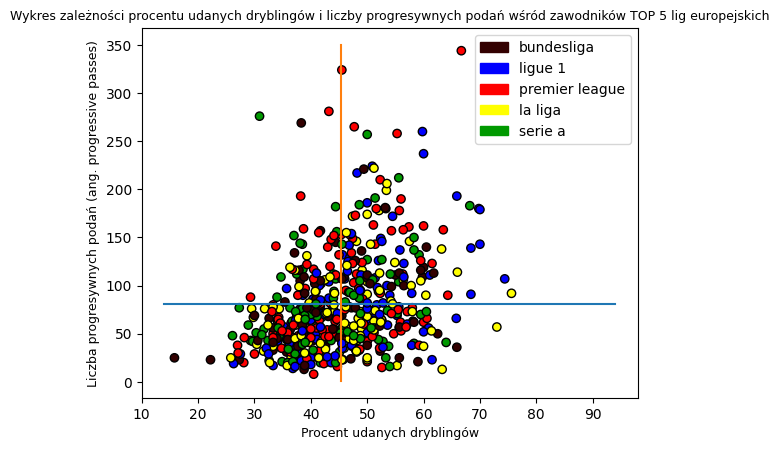

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
legend_dict = { 'bundesliga' : '#330000', 'ligue 1' : '#0000ff', 'premier league' : '#ff0000' , 'la liga':'#ffff00', 'serie a': '#009900'}
xs = np.linspace(14,94,len(ostateczna))
ys = np.linspace(1,350,len(ostateczna))
fig,ax = plt.subplots()
plt.title("Wykres zależności procentu udanych dryblingów i liczby progresywnych podań wśród zawodników TOP 5 lig europejskich", fontsize=9)
ax.scatter(procent,progresywne,c=kolorki, edgecolors='black')
ax.plot(xs,sr_progresywne)
ax.plot(sr_procent,ys)
ax.set_xlabel("Procent udanych dryblingów",fontsize=9)
ax.set_ylabel("Liczba progresywnych podań (ang. progressive passes)",fontsize=9)
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
plt.show()

In [42]:
procent_proba,progresywne_proba = procent,progresywne
def srednia_arytmetyczna(X):
    return sum(X)/len(X)
def odchylenie_standardowe(X):
    return np.sqrt(sum(np.array(X)**2-srednia_arytmetyczna(X)**2)/(len(X)-1))
def mediana(X):
    X.sort()
    if len(X)%2 == 0:
        return (X[int(len(X)/2)]+X[int((len(X)+2)/2)])/2
    else:
        return X[int((len(X)-1)/2)]
def srednia_windsorowska(X, k):
    X.sort()
    return 1/len(X) * ((k+1)*X[k] + sum(X[k+2:len(X)-k]) + (k+1)*X[len(X)-k-1])
def srednia_ucinana(X, k):
    X.sort()
    return sum(X[k+1:len(X)-k+1]) / (len(X)-2*k)
def srednia_harmoniczna(X):
    return len(X)/(sum(1/np.array(X)))
def srednia_geometryczna(X):
    return (np.array(X)**(1/len(X))).prod()
print("średnia arytmetyczna DRYBLING:",srednia_arytmetyczna(procent_proba)) 
print("średnia arytmetyczna PROGRES.PODANIA:",srednia_arytmetyczna(progresywne_proba),"\n",'----') 
print("odchylenie standardowe DRYBLING:",odchylenie_standardowe(procent_proba))
print("odchylenie standardowe PROGRES.PODANIA:",odchylenie_standardowe(progresywne_proba),"\n",'----')
print("mediana DRYBLING:",mediana(procent_proba))
print("mediana PROGRES.PODANIA:",mediana(progresywne_proba),"\n",'----')
print("średnia winsorowska DRYBLING:",srednia_windsorowska(procent_proba,50))
print("średnia winsorowska PROGRES.PODANIA:",srednia_windsorowska(progresywne_proba,50),"\n",'----')
print("średnia ucinana DRYBLING:",srednia_ucinana(procent_proba,50))
print("średnia ucinana PROGRES.PODANIA:",srednia_ucinana(progresywne_proba,50),"\n",'----')
print("średnia harmoniczna DRYBLING:",srednia_harmoniczna(procent_proba))
print("średnia harmoniczna PROGRES.PODANIA:",srednia_harmoniczna(progresywne_proba),"\n",'----')
print("średnia geometryczna DRYBLING:",srednia_geometryczna(procent_proba))
print("średnia geometryczna PROGRES.PODANIA:",srednia_geometryczna(progresywne_proba))

średnia arytmetyczna DRYBLING: 45.364661654135354
średnia arytmetyczna PROGRES.PODANIA: 81.046992481203 
 ----
odchylenie standardowe DRYBLING: 9.201338193748715
odchylenie standardowe PROGRES.PODANIA: 52.270623934778364 
 ----
mediana DRYBLING: 44.650000000000006
mediana PROGRES.PODANIA: 68.0 
 ----
średnia winsorowska DRYBLING: 45.28928571428571
średnia winsorowska PROGRES.PODANIA: 77.42105263157895 
 ----
średnia ucinana DRYBLING: 45.1136574074074
średnia ucinana PROGRES.PODANIA: 74.62731481481481 
 ----
średnia harmoniczna DRYBLING: 43.4576586765694
średnia harmoniczna PROGRES.PODANIA: 53.99887500973744 
 ----
średnia geometryczna DRYBLING: 44.424979497680035
średnia geometryczna PROGRES.PODANIA: 66.67758322993156


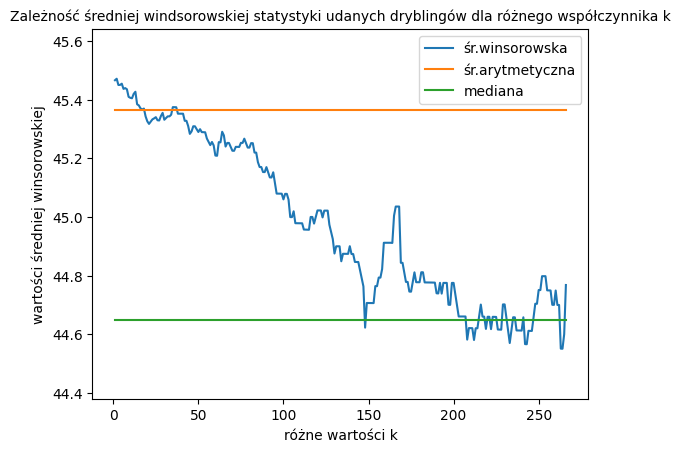

In [45]:
xs1 = np.linspace(1,266,266)
ys1 = [srednia_windsorowska(procent, i) for i in range(1,267)]
srednia1 = [srednia_arytmetyczna(procent) for i in range(1,267)]
mediana1 = [mediana(procent) for i in range(1,267)]
plt.plot(xs1,ys1,label="śr.winsorowska")
plt.plot(xs1, srednia1,label="śr.arytmetyczna")
plt.plot(xs1, mediana1,label="mediana")
plt.xlabel("różne wartości k")
plt.ylim(44.38,45.64)
plt.ylabel("wartości średniej winsorowskiej")
plt.title("Zależność średniej windsorowskiej statystyki udanych dryblingów dla różnego współczynnika k",fontsize=10)
plt.legend()
plt.show()

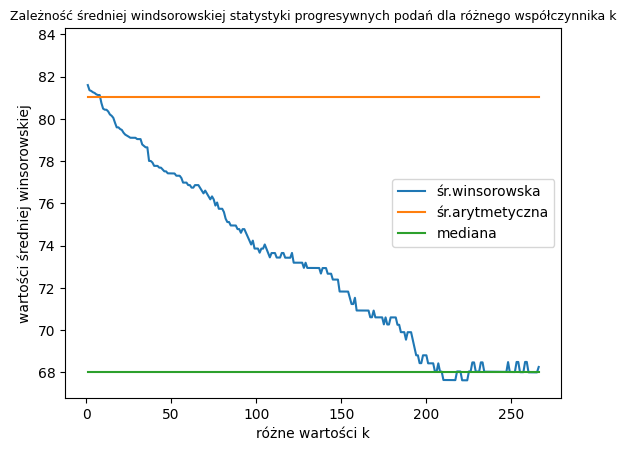

In [44]:
xs2 = np.linspace(1,266,266)
ys2 = [srednia_windsorowska(progresywne, i) for i in range(1,267)]
srednia2 = [srednia_arytmetyczna(progresywne) for i in range(1,267)]
mediana2 = [mediana(progresywne) for i in range(1,267)]
plt.plot(xs2,ys2,label="śr.winsorowska")
plt.plot(xs2, srednia2,label="śr.arytmetyczna")
plt.plot(xs2, mediana2,label="mediana")
plt.xlabel("różne wartości k")
plt.ylim(66.8,84.3)
plt.ylabel("wartości średniej winsorowskiej")
plt.title("Zależność średniej windsorowskiej statystyki progresywnych podań dla różnego współczynnika k",fontsize=9)
plt.legend()
plt.show()

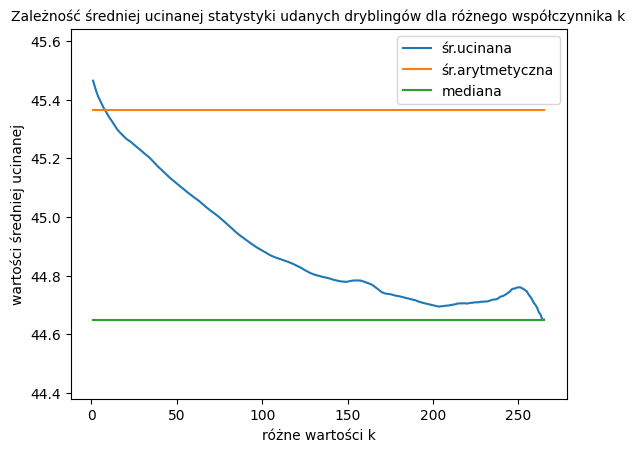

In [48]:
xs3 = np.linspace(1,265,265)
ys3 = [srednia_ucinana(procent, i) for i in range(1,266)]
srednia3 = [srednia_arytmetyczna(procent) for i in range(1,266)]
mediana3 = [mediana(procent) for i in range(1,266)]
plt.plot(xs3,ys3,label="śr.ucinana")
plt.plot(xs3, srednia3,label="śr.arytmetyczna")
plt.plot(xs3, mediana3,label="mediana")
plt.xlabel("różne wartości k")
plt.ylim(44.38,45.64)
plt.ylabel("wartości średniej ucinanej")
plt.title("Zależność średniej ucinanej statystyki udanych dryblingów dla różnego współczynnika k",fontsize=10)
plt.legend()
plt.show()

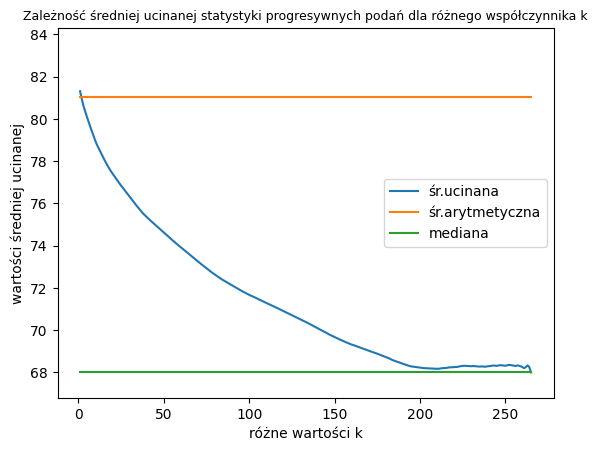

In [49]:
xs4 = np.linspace(1,265,265)
ys4 = [srednia_ucinana(progresywne, i) for i in range(1,266)]
srednia4 = [srednia_arytmetyczna(progresywne) for i in range(1,266)]
mediana4 = [mediana(progresywne) for i in range(1,266)]
plt.plot(xs4,ys4,label="śr.ucinana")
plt.plot(xs4, srednia4,label="śr.arytmetyczna")
plt.plot(xs4, mediana4,label="mediana")
plt.xlabel("różne wartości k")
plt.ylim(66.8,84.3)
plt.ylabel("wartości średniej ucinanej")
plt.title("Zależność średniej ucinanej statystyki progresywnych podań dla różnego współczynnika k",fontsize=9)
plt.legend()
plt.show()

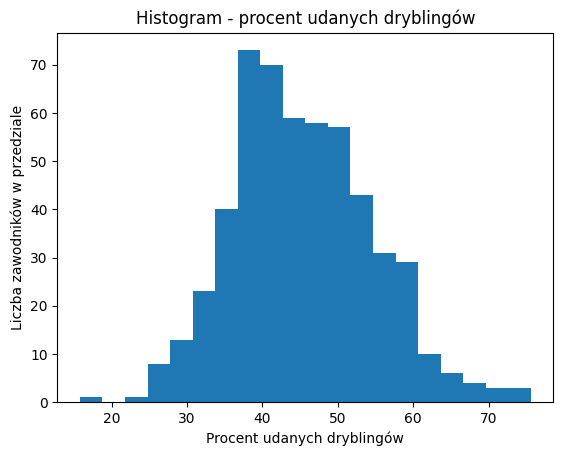

In [51]:
plt.hist(procent, bins = 20)
plt.title("Histogram - procent udanych dryblingów")
plt.xlabel("Procent udanych dryblingów")
plt.ylabel("Liczba zawodników w przedziale")
plt.show()

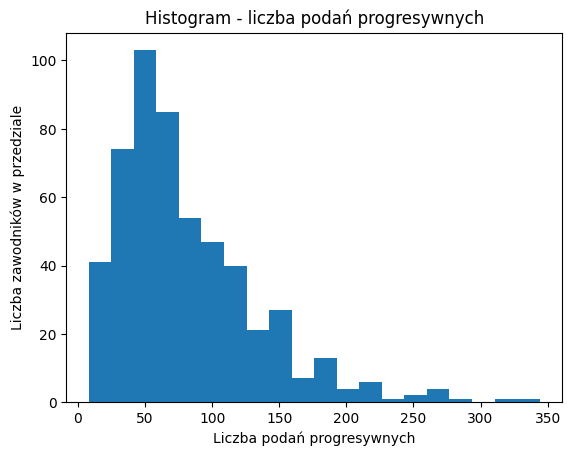

In [53]:
plt.hist(progresywne, bins = 20)
plt.title("Histogram - liczba podań progresywnych")
plt.xlabel("Liczba podań progresywnych")
plt.ylabel("Liczba zawodników w przedziale")
plt.show()

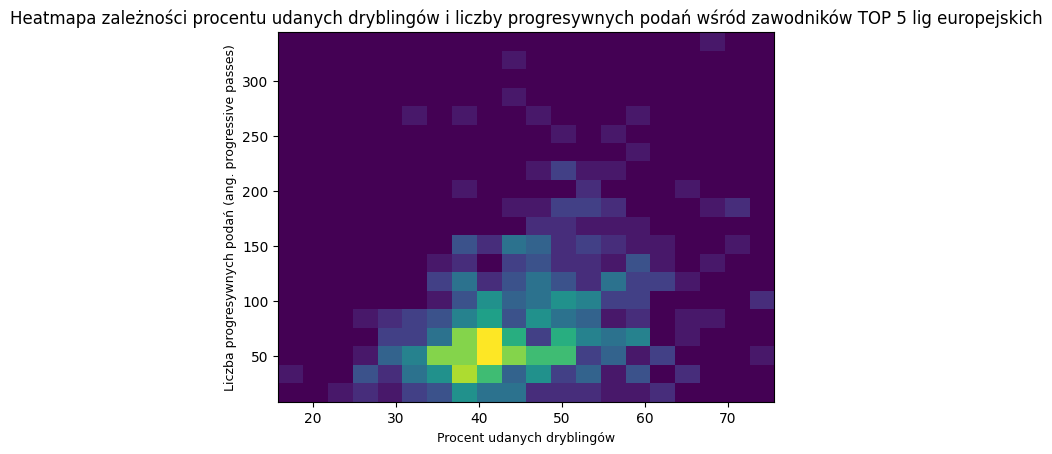

In [57]:
plt.hist2d(procent, progresywne, bins=20)
plt.title("Heatmapa zależności procentu udanych dryblingów i liczby progresywnych podań wśród zawodników TOP 5 lig europejskich")
plt.xlabel("Procent udanych dryblingów",fontsize=9)
plt.ylabel("Liczba progresywnych podań (ang. progressive passes)",fontsize=9)
plt.show()

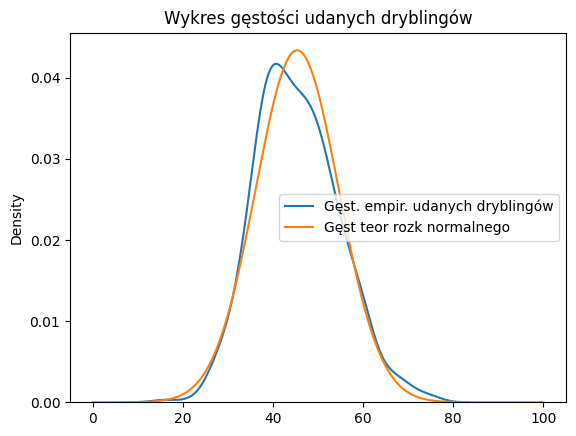

In [58]:
sns.kdeplot(procent, label="Gęst. empir. udanych dryblingów")
plt.title("Wykres gęstości udanych dryblingów")
x_axis1 = np.arange(0, 100, 0.001)
plt.plot(x_axis1, scipy.stats.norm.pdf(x_axis1,srednia_arytmetyczna(procent),odchylenie_standardowe(procent)), label = "Gęst teor rozk normalnego")
plt.legend(loc ="best")
plt.show()

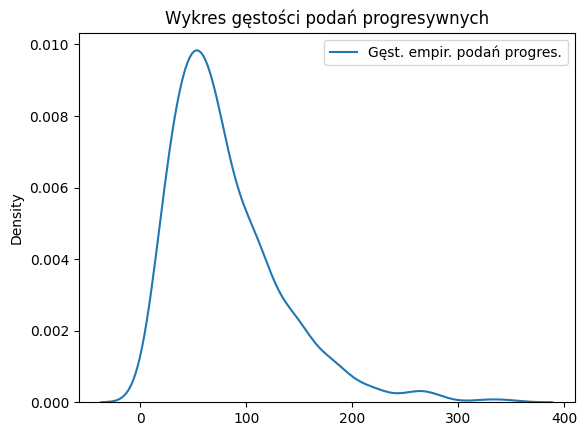

In [59]:
sns.kdeplot(progresywne,label="Gęst. empir. podań progres.")
plt.title("Wykres gęstości podań progresywnych")
plt.legend()
plt.show()

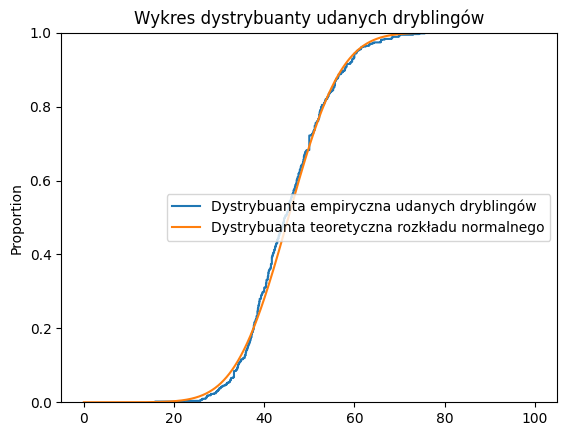

In [60]:
sns.ecdfplot(procent, label = "Dystrybuanta empiryczna udanych dryblingów")
plt.title("Wykres dystrybuanty udanych dryblingów")
x_axis2 = np.arange(0, 100, 0.001)
plt.plot(x_axis2, scipy.stats.norm.cdf(x_axis2,srednia_arytmetyczna(procent),odchylenie_standardowe(procent)), label = "Dystrybuanta teoretyczna rozkładu normalnego")
plt.legend()
plt.show()

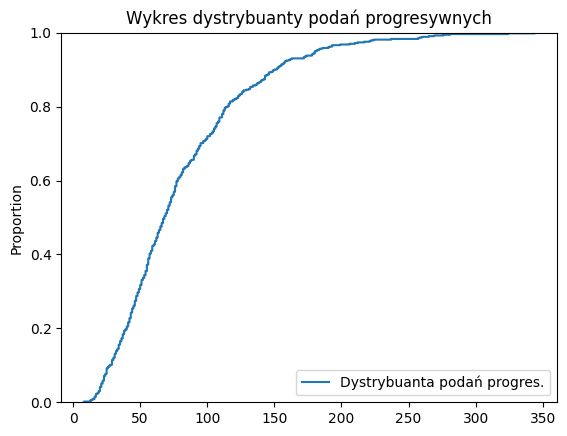

In [61]:
sns.ecdfplot(progresywne,label="Dystrybuanta podań progres.")
plt.title("Wykres dystrybuanty podań progresywnych")
plt.legend()
plt.show()

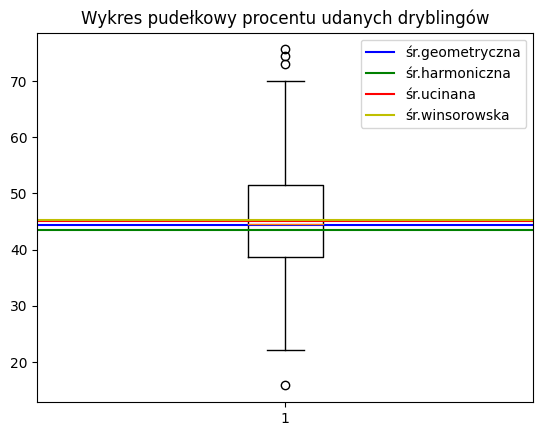

In [62]:
plt.boxplot(procent)
plt.title("Wykres pudełkowy procentu udanych dryblingów")
plt.axhline(srednia_geometryczna(procent), c="b",label="śr.geometryczna")
plt.axhline(srednia_harmoniczna(procent), c="g",label="śr.harmoniczna")
plt.axhline(srednia_ucinana(procent,50), c="r",label="śr.ucinana")
plt.axhline(srednia_windsorowska(procent,50), c="y",label="śr.winsorowska")
plt.legend()
plt.show()

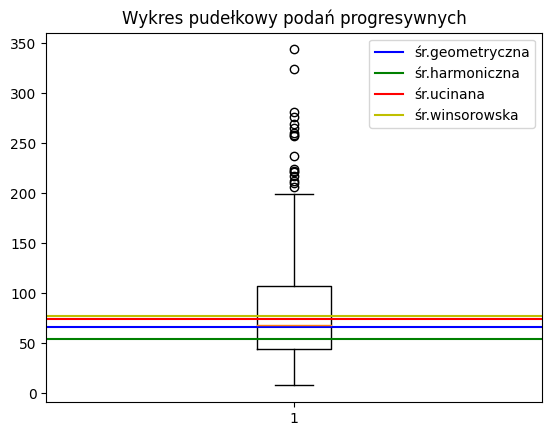

In [63]:
plt.boxplot(progresywne)
plt.title("Wykres pudełkowy podań progresywnych")
plt.axhline(srednia_geometryczna(progresywne), c="b",label="śr.geometryczna")
plt.axhline(srednia_harmoniczna(progresywne), c="g",label="śr.harmoniczna")
plt.axhline(srednia_ucinana(progresywne,50), c="r",label="śr.ucinana")
plt.axhline(srednia_windsorowska(progresywne,50), c="y",label="śr.winsorowska")
plt.legend()
plt.show()

In [64]:
def kowariancja(X,Y):
    return srednia_arytmetyczna(np.array(X)*np.array(Y))-srednia_arytmetyczna(X)*srednia_arytmetyczna(Y)
def korelacja_Pearsona(X,Y):
    return kowariancja(X,Y)/(odchylenie_standardowe(X)*odchylenie_standardowe(Y))

print("kowariancja X i Y:",kowariancja(procent, progresywne),"\n","----")
print("korelacja Pearsona X i Y:",korelacja_Pearsona(procent, progresywne),"\n","----")
import scipy

print("korelacja Spearmana X i Y:",scipy.stats.spearmanr(procent,progresywne)[0])

kowariancja X i Y: 462.4864350726434 
 ----
korelacja Pearsona X i Y: 0.9615908488919055 
 ----
korelacja Spearmana X i Y: 0.999898933080164
